# **Regresión Logística - Aprendizaje Supervisado**

# **Programa Breast Cancer Wisconsin**

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (AAF) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. Algunas de las imágenes se pueden encontrar en https://pages.cs.wisc.edu/~olvi/uwmp/cancer.html El plano de separación descrito anteriormente se obtuvo utilizando el método de árbol multisuperficie (MSM-T) [KP Bennett, "Construcción de árboles de decisión mediante programación lineal". Actas de la 4.ª Midwest Artificial Intelligence and Cognitive Science Society, págs. 97-101, 1992], un método de clasificación que utiliza programación lineal para construir un árbol de decisión. Las características relevantes se seleccionaron utilizando una búsqueda exhaustiva en el espacio de 1 a 4 características y 1 a 3 planos de separación. El programa lineal real utilizado para obtener el plano de separación en el espacio tridimensional es el descrito en: [KP Bennett y OL Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. Esta base de datos también está disponible a través del servidor FTP de UW CS: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Para mayor información [Clic aquí](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)



## Etapa 1: Entendimiento de los datos

In [1]:
# Carga de librerias y preparacion del entorno de trabajo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    !pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

In [2]:
# Obtener el conjunto de datos
breast_cancer_wisconsin_original = fetch_ucirepo(id=17)

features = breast_cancer_wisconsin_original.data.features
targets = breast_cancer_wisconsin_original.data.targets

In [3]:
# Gestion del Dataframe
df = pd.DataFrame(data=features, columns=breast_cancer_wisconsin_original.data.feature_names)
df['target'] = targets

In [4]:
# Set de Datos
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [5]:
# Informacion de las Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [6]:
# Informacion estadistica de las Etiquetas
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


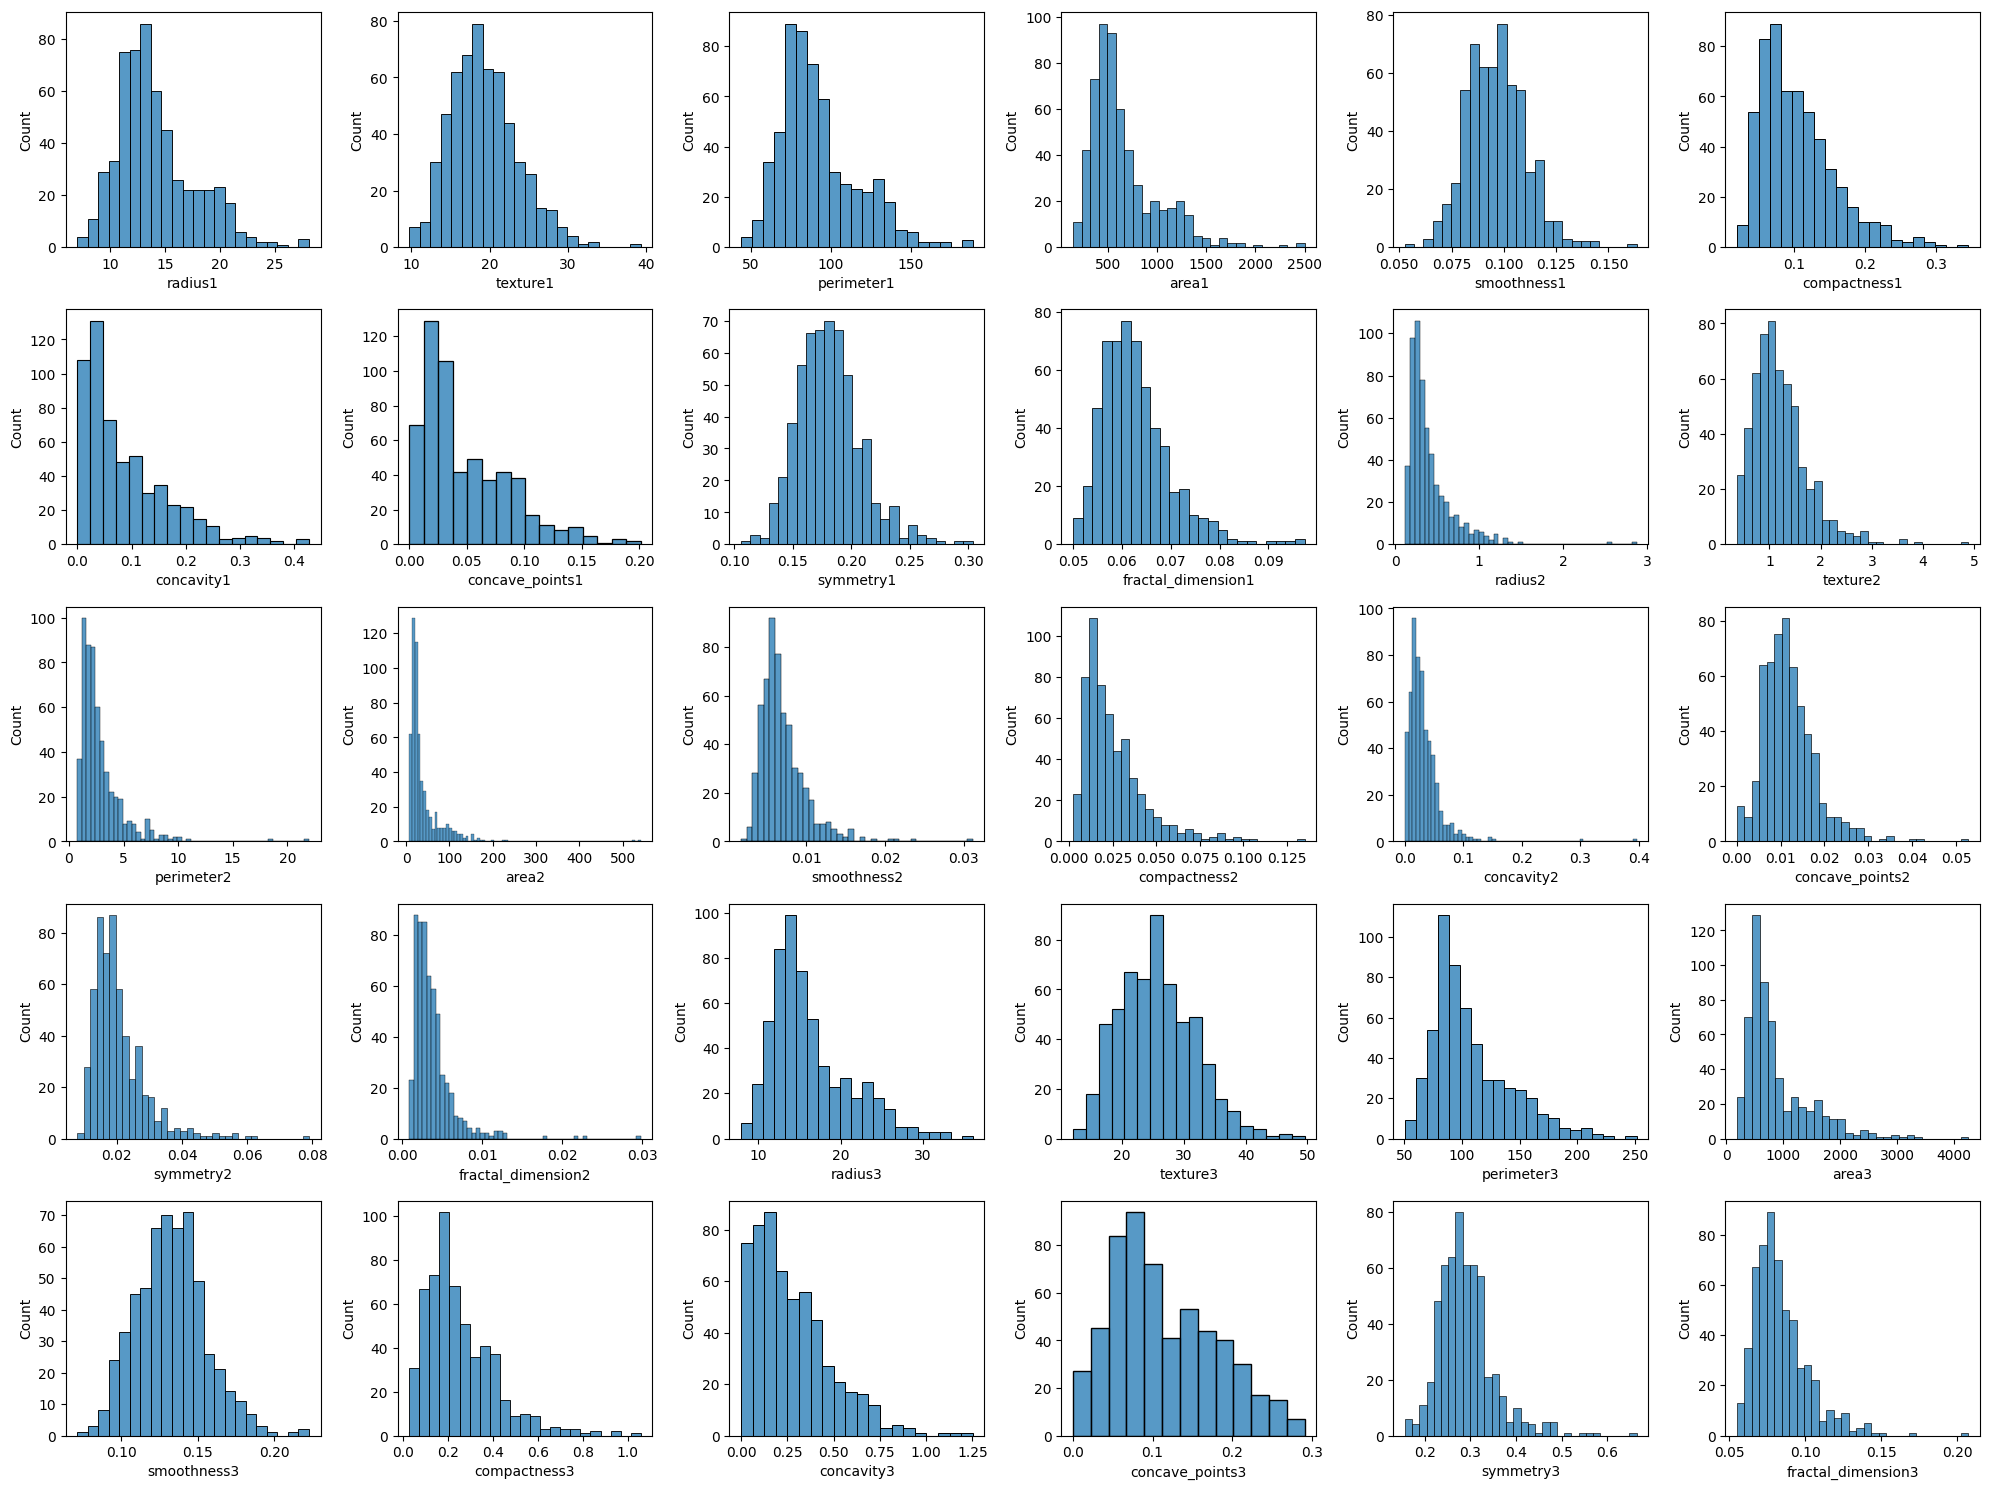

In [7]:
# Visualizacion estadistica
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Etapa 2: Preparación de los datos






In [8]:
# Cantidad de valores nulos
df.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


In [9]:
# Cantidad de valores Nan
df.isna().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


In [10]:
# Separar caracteristicas y etiquetas
X = df.drop('target', axis=1)
y = df['target']

In [11]:
# Caracteristicas
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# Etiquetas
y

,target
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


target
B    357
M    212
dtype: int64


<Axes: xlabel='target'>

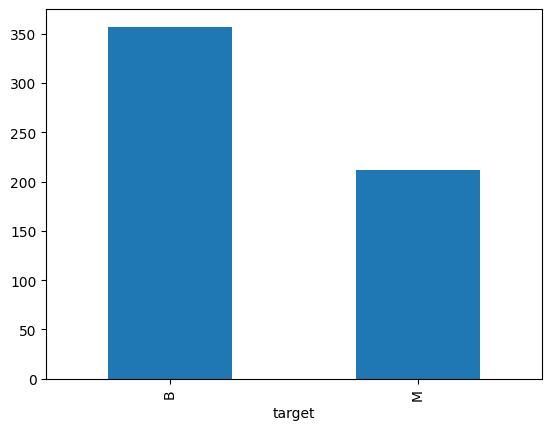

In [13]:
count_feature = df.groupby('target').size()
print(count_feature)
count_feature.plot.bar()

## Etapa 3: Modelado

In [14]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [17]:
# Crear el modelo de regresion logistica
model_init = LogisticRegression()
# Entrenar el modelo de regresion logistica
model_init.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Esccalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Crear el modelo de regresion logistica
model = LogisticRegression()
# Entrenar el modelo de regresion logistica
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Aplicación del modelo construido a los datos de test
y_pred = model.predict(X_test)

In [23]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
# Mostrar el informe de clasificación
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Etapa 4: Predicción Futura

In [25]:
# Nuevos datos
datos = pd.DataFrame ({
   'Caracteristicas': ['radius1',	'texture1',	'perimeter1',	'area1',	'smoothness1',
                       'compactness1',	'concavity1',	'concave_points1',	'symmetry1',
                       'fractal_dimension1',	'radius2',	'texture2',	'perimeter2',
                       'area2',	'smoothness2',	'compactness2',	'concavity2',
                       'concave_points2',	'symmetry2',	'fractal_dimension2',
                       'radius3',	'texture3',	'perimeter3',	'area3',	'smoothness3',
                       'compactness3',	'concavity3',	'concave_points3',	'symmetry3',
                       'fractal_dimension3'],
   'ValoresM': [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419,
               0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373,
               0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622,
               0.6656, 0.7119, 0.2654, 0.4601, 0.1189],
   'ValoresB': [13.05, 19.31, 82.61, 527.2, 0.0806, 0.03789, 0.000692, 0.004167,
                0.1819, 0.05501, 0.404, 1.214, 2.595, 32.96, 0.007491, 0.008593,
                0.000692, 0.004167, 0.0219, 0.00299, 14.23, 22.25, 90.24, 624.1,
                0.1021, 0.06191, 0.001845, 0.01111, 0.2439, 0.06289]
    })

In [27]:
import numpy as np

# Extraer los datos como un arreglo unidimensional
X_future = np.array([datos['ValoresB']])

# Escalar los nuevos datos
X_future_scaled = scaler.transform(X_future)

# Realizar la predicción
y_future_pred = model.predict(X_future_scaled)

labels = {'B': "Benigno", 'M': "Maligno"}

# Mostrar el resultado
print(f"Predicción de Cancer es: {labels.get(y_future_pred[0], 'Predicción desconocida')}")

Predicción de Cancer es: Benigno


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Etapa 5: Despliegue

In [28]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_regresion.pkl', 'wb') as file:
    pickle.dump(model, file)